In [1]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("D:\leapGestRecog\leapGestRecog"))

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']


In [2]:
from PIL import Image
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display
path='D:\leapGestRecog\leapGestRecog'
folders=os.listdir(path)
folders=set(folders)
different_classes=os.listdir(path+'/'+'00')
different_classes=set(different_classes)
print("The different classes that exist in this dataset are:")
print(different_classes)

The different classes that exist in this dataset are:
{'09_c', '07_ok', '04_fist_moved', '02_l', '10_down', '03_fist', '01_palm', '08_palm_moved', '05_thumb', '06_index'}


In [3]:
x=[]
z=[]
y=[] #We declare y here for converting the image into black and white
threshold=200
import cv2
for i in folders:
    print('***',i,'***')
    subject=path+'/'+i
    subdir=os.listdir(subject)
    subdir=set(subdir)
    for j in subdir:
        images=os.listdir(subject+'/'+j)
        for k in images:
            results=dict()
            results['y']=j.split('_')[0]
            img=cv2.imread(subject+'/'+j+'/'+k,0)
            img=cv2.resize(img,(int(160),int(60)))
            ret,imgf=cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            imgD=np.asarray(img,dtype=np.float64)
            z.append(imgD)
            imgf=np.asarray(imgf,dtype=np.float64)
            x.append(imgf)
            y.append(int(j.split('_')[0]))
            results['x']=imgf

*** 08 ***
*** 02 ***
*** 00 ***
*** 01 ***
*** 04 ***
*** 09 ***
*** 07 ***
*** 05 ***
*** 03 ***
*** 06 ***


# Tracing the image in datset

Class Label: 1


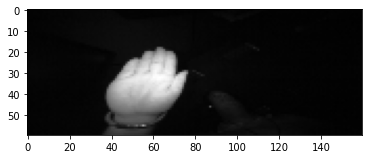

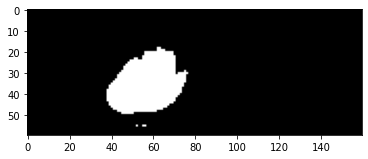

Class Label: 2


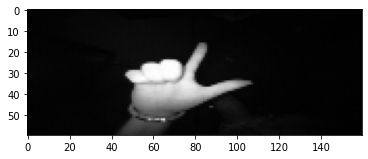

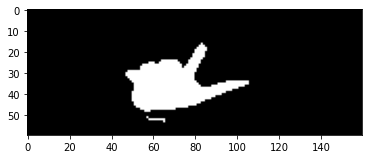

Class Label: 3


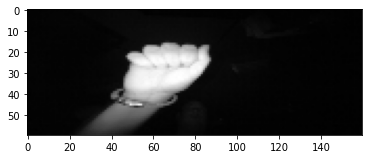

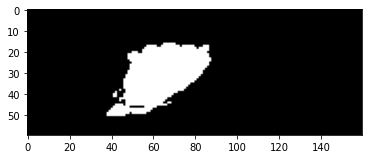

Class Label: 4


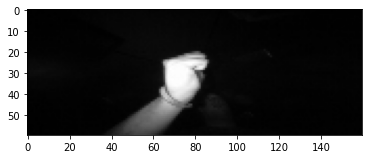

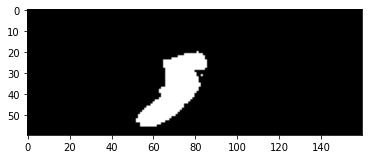

Class Label: 5


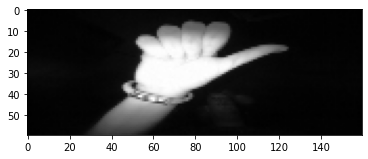

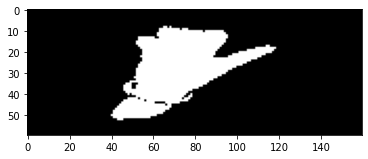

Class Label: 6


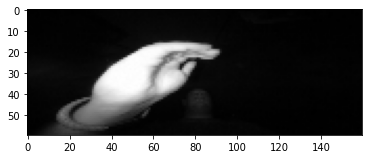

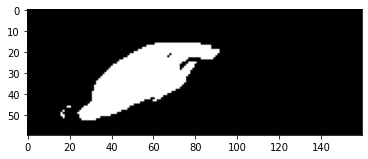

Class Label: 7


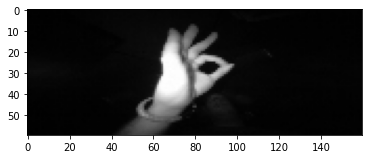

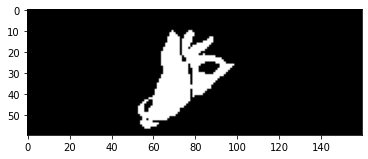

Class Label: 8


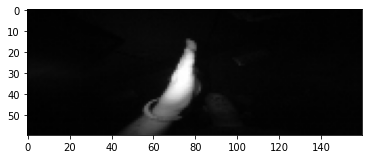

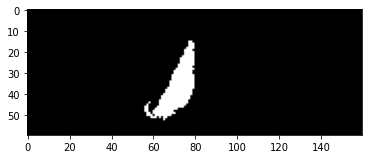

Class Label: 9


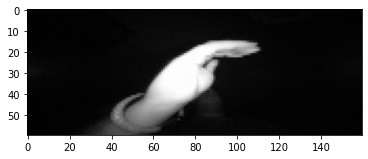

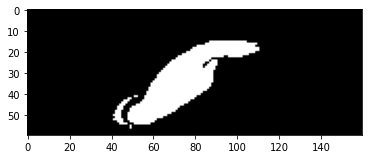

Class Label: 10


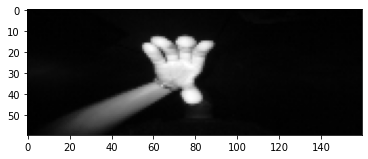

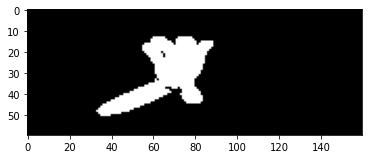

In [4]:
l=[]
list_names=[]
for i in range(10):
    l.append(0)
for i in range(len(x)):
    if(l[y[i]-1]==0):
        l[y[i]-1]=i
        if(len(np.unique(l))==10):
            break
for i in range(len(l)):
    %matplotlib inline
    print("Class Label: "+str(i + 1))
    plt.imshow(np.asarray(z[l[i]]),cmap=cm.gray)
    plt.show()
    plt.imshow(np.asarray(x[l[i]]),cmap=cm.gray)     
    plt.show()

In [5]:
x=np.array(x)
y=np.array(y)
y=y.reshape(len(x),1)
print(x.shape)
print(y.shape)
print(max(y),min(y))

(20000, 60, 160)
(20000, 1)
[10] [1]


In [6]:
x_data=x.reshape((len(x),60,160,1))
x_data/=255
x_data=list(x_data)
for i in range(len(x_data)):
    x_data[i]=x_data[i].flatten()

In [7]:
len(x_data)

20000

# PCA and Pre-Processing of the data

In [ ]:
PCA stands for Principal Component analysis
PCA is basically used o reduce the dimensions of varibales of a large dataset into smaller one which 
is easier to analyze
In image processing if we have a dataset contatining many images then we use PCA,images forms a matrix 
with each row of pixels as a vector, This requires a lot of space. Using PCA we can compress it and
preserve the data

In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=20)
x_data=np.array(x_data)
print("Before PCA",x_data.shape)

Before PCA (20000, 9600)


In [9]:
x_data=pca.fit_transform(x_data)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  
print('___________________')
print("After PCA",x_data.shape)

[0.25498139 0.08075452 0.06690615 0.041779   0.03379988 0.03188952
 0.02433627 0.02123843 0.01862449 0.01679004 0.01509599 0.01309636
 0.01163084 0.01093525 0.00949862 0.00920234 0.0087492  0.00804043
 0.00764505 0.0075621 ]
[1529.79553924  860.91952673  783.6320034   619.23884469  556.97628433
  541.00728367  472.61356719  441.50976741  413.44844401  392.55902698
  372.22881867  346.70044681  326.72670953  316.80601541  295.26323915
  290.62186039  283.37622021  271.65567633  264.89236085  263.45130562]
___________________
After PCA (20000, 20)


# Importing test_train_split model 

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y,test_size=0.3)

# Using standard scaler

In [ ]:
StandardScaler will transform our data in such a way that its distribution will have 
a mean value 0 and standard deviation of 1.

In [11]:
from sklearn.preprocessing import StandardScaler  
scaler=StandardScaler()  
scaler.fit(x_train)
X_train=scaler.transform(x_train)  
X_test=scaler.transform(x_test)  

# MODELS for predicting-

## 1.DECISION TREE

In [12]:
from sklearn import tree
dt=tree.DecisionTreeClassifier(max_depth=10)
dt=dt.fit(X_train,y_train)

In [13]:
y_pred_dt=dt.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Decision Tree model is:\n",accuracy_score(y_test,y_pred_dt,normalize=True,sample_weight=None))

Accuracy of the Decision Tree model is:
 0.9321666666666667


## 2.RANDOM FOREST

In [15]:
from sklearn.ensemble import RandomForestClassifier
rft=RandomForestClassifier(n_estimators=100,max_depth=15,random_state=0)
rft=rft.fit(X_train, y_train)

C:\Users\Sathya\AppData\Local\Temp\ipykernel_14188\82254691.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rft=rft.fit(X_train, y_train)


In [16]:
y_pred_rft=rft.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Random Forest model is:\n",accuracy_score(y_test,y_pred_rft,normalize=True,sample_weight=None))

Accuracy of the Random Forest model is:
 0.9986666666666667


## 3.LOGISTIC REGRESSION

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression(solver='newton-cg')

In [19]:
logi.fit(X_train,y_train)

C:\Users\Sathya\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='newton-cg')

In [20]:
y_pred_logi=logi.predict(X_test)
print("Accuracy of the Logistic Regression model is:\n",accuracy_score(y_test,y_pred_logi,normalize=True,sample_weight=None))

Accuracy of the Logistic Regression model is:
 0.757


## 4.NAIVE BAYES CLASSIFIER

In [21]:
from sklearn.naive_bayes import GaussianNB 
gnb=GaussianNB() 
gnb.fit(X_train,y_train)

C:\Users\Sathya\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [22]:
y_pred_gnb=gnb.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Gauusian Naive Bayes model is:\n",accuracy_score(y_test,y_pred_gnb,normalize=True,sample_weight=None))

Accuracy of the Gauusian Naive Bayes model is:
 0.6571666666666667


## On seeing the given accuracies we can tell that random forest model is the most accurate 
## with an accuracy of approximately 99.87%